# **Matplotlib in Python**

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

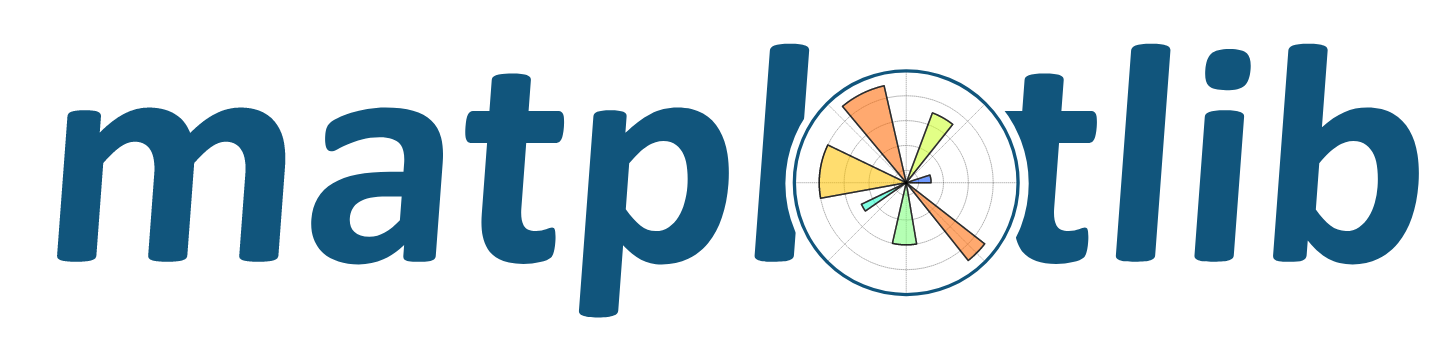

Matplotlib produces publication-quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, web application servers, and various graphical user interface toolkits.

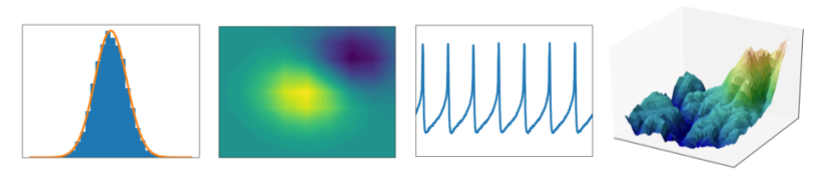

## **Basics of Matplotlib**

####**Anatomy of a "Plot"** 

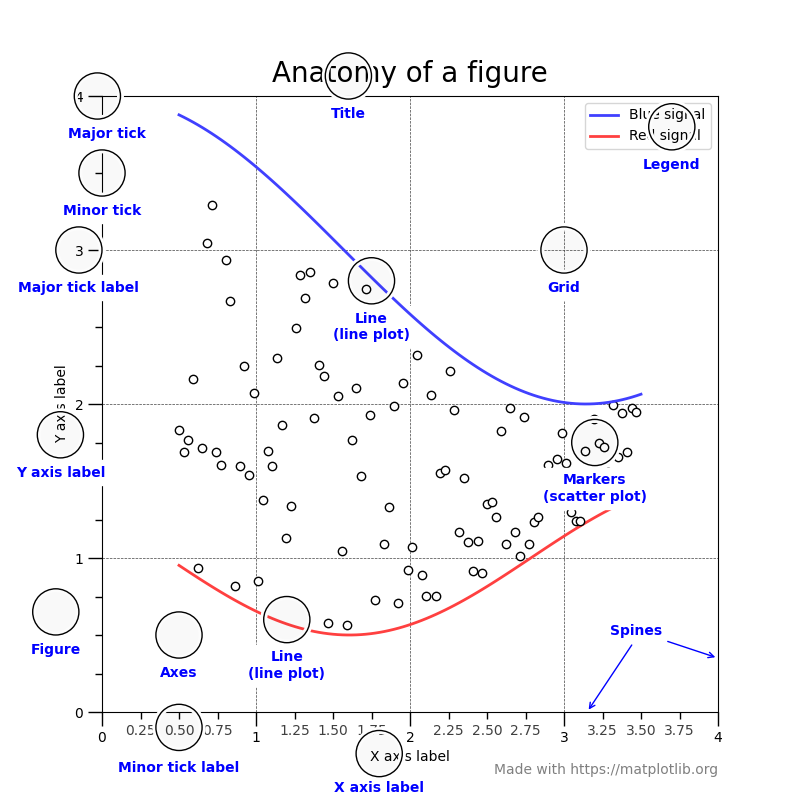

##### Figure

The whole figure. The figure keeps track of all the child [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes), a smattering of 'special' artists (titles, figure legends, etc), and the canvas. (Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can contain any number of [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes), but will typically have at least one.

The easiest way to create a new figure is with pyplot:

In [ ]:
!python -m pip install pip --upgrade --user -q

In [ ]:
!python -m pip install matplotlib numpy pandas scipy --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

It's convenient to create the axes together with the figure, but you can also add axes later on, allowing for more complex axes layouts.

##### Axes


This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure). The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via the axes.[Axes.set_xlim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html#matplotlib.axes.Axes.set_xlim) and [axes.Axes.set_ylim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html#matplotlib.axes.Axes.set_ylim) methods). Each Axes has a title (set via [set_title()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title)), an x-label (set via [set_xlabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel), and a y-label set via [set_ylabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib.axes.Axes.set_ylabel)).

The Axes class and its member functions are the primary entry point to working with the OO interface.



#####Axis

These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.



##### Artist

Basically, everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.


##### Types of inputs to plotting functions

All of plotting functions expect [numpy.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array) or [numpy.ma.masked_array](https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_array.html#numpy.ma.masked_array) as input. Classes that are 'array-like' such as pandas data objects and [numpy.matrix](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html#numpy.matrix) may or may not work as intended. It is best to convert these to numpy.array objects prior to plotting.

For example, to convert a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame).

In [ ]:
import pandas as pd
a = pd.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
a_asarray = a.values

and to convert a `numpy.matrix`

In [ ]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

##### The object-oriented interface and the pyplot interface

As noted above, there are essentially two ways to use Matplotlib:

> * Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").
> * Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.

So one can do (OO-style)

In [ ]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

or (pyplot-style)

In [ ]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

which you would then use as:

In [ ]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

or if you wanted to have 2 sub-plots:

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

#### **A simple Example**

Matplotlib graphs your data on Figures (i.e., windows, Jupyter widgets, etc.), each of which can contain one or more Axes (i.e., an area where points can be specified in terms of x-y coordinates, or theta-r in a polar plot, or x-y-z in a 3D plot, etc.). The simplest way of creating a figure with an axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the axes:

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [ ]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

Many other plotting libraries or languages do not require you to explicitly create an axes,  you can do the same in Matplotlib.

for each Axes graphing method, there is a corresponding function in the matplotlib.pyplot module that performs that plot on the "current" axes, creating that axes (and its parent figure) if they don't exist yet. So, the previous example can be written more shortly as

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Matplotlib plot.

### **PyPlot Tutorial**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.plot([1,2,3,4],[6,7,8,9])
plt.show()


Adding Labels & Title

In [ ]:
plt.plot([1,2,3,4],[6,7,8,9])
plt.xlabel("X - Axis")
plt.ylabel("Y- label")
plt.title("First Plot")
plt.show()

With every X and Y argument, you can also pass an optional third argument in the form of a string which indicates the colour and line type of the plot. The default format is b- which means a solid blue line. In the figure below we use go which means green circles. Likewise, we can make many such combinations to format our plot.

In [ ]:
plt.plot([1,2,3,4],[6,7,8,9], "go")
plt.xlabel("X - Axis")
plt.ylabel("Y- label")
plt.title("First Plot")
plt.show()

We can also plot multiple sets of data by passing in multiple sets

In [ ]:
x = np.arange(5)
y = x**3
plt.plot([1,2,3,4],[6,7,8,9],"go", x, y, "r^")
plt.xlabel("X - Axis")
plt.ylabel("Y- label")
plt.title("First Plot")
plt.show()

In [ ]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

Plotting with keyword strings

In [ ]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

Plotting with categorical variables

In [ ]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

Controlling line properties

Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; see `matplotlib.lines.Line2D`. There are several ways to set line properties

> * Use keyword args:

In [ ]:
plt.plot([1,2,3,4],[6,7,8,9], linewidth=4.0)
plt.show()

Use the setter methods of a Line2D instance. plot returns a list of Line2D objects; e.g., line1, `line2 = plot(x1, y1, x2, y2)`. In the code below we will suppose that we have only one line so that the list returned is of length 1. We use tuple unpacking with line, to get the first element of that list:

In [ ]:
line, = plt.plot([1,2,3,4],[6,7,8,9], '-')
line.set_antialiased(False) # turn off antialiasing

Use setp. The example below uses a MATLAB-style function to set multiple properties on a list of lines. setp works transparently with a list of objects or a single object. You can either use python keyword arguments or MATLAB-style string/value pairs:

In [ ]:
lines = plt.plot([1,2,3,4],[6,7,8,9], [1,2,3,4], [1,8,16,25])
# use keyword args
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

# fig.savefig("test.png")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

### **Multiple SubPlots In One Figure**

 we want to create two sub-plots in one figure such that it comes in one row and in two columns and hence we pass arguments (1,2,1) and (1,2,2) in the subplot() method.

In [ ]:
plt.subplot(1,2,1)
plt.plot([1,2,3,4],[6,7,8,9],"go")
plt.title("First Plot")

x = np.arange(5)
y = x**3
plt.subplot(1,2,2)
plt.plot(x,y, "r^")
plt.title("Second Plot")

plt.suptitle("Two plots in one figure")
plt.show()

In [ ]:
plt.subplot(2,1,1)
plt.plot([1,2,3,4],[6,7,8,9],"go")
plt.title("First Plot")

x = np.arange(5)
y = x**3
plt.subplot(2,1,2)
plt.plot(x,y, "r^")
plt.title("Second Plot")

plt.suptitle("Two plots in one figure")
plt.show()

## **Types of Charts**

### **Line Plots**

In [ ]:
# availables styles
plt.style.available

In [ ]:
plt.style.use('seaborn-white')

# Median Developer Salaries by Age
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

# Median Python Developer Salaries by Age

py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]


plt.plot(ages_x, dev_y, label='All Devs')
plt.plot(ages_x, py_dev_y, label='Python')

plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Age")

# adding legend
# method 1
# plt.legend(['All Devs', 'Python'])
# method 2 - pass a label argument to plot

plt.legend()

In [ ]:
# A format string consists of a part for color, marker and line:
fmt = '[marker][line][color]'


####Markers

`character` 	  description

* `.`         point marker
* `,` 	      pixel marker
* `o `	      circle marker
* `v `	      triangle_down marker
* `^ `	      triangle_up marker
*` < `	      triangle_left marker
* `> `	      triangle_right marker
*` 1 	`      tri_down marker
* `2 	  `    tri_up marker
* `3 `	      tri_left marker
* `4 `	      tri_right marker
*` s `	      square marker
* `p `	      pentagon marker
* `*	  `      star marker
* `h `	      hexagon1 marker
* `H 	 `     hexagon2 marker
* `+ `	      plus marker
*` x `	      x marker
* `D `	      diamond marker
* `d `	      thin_diamond marker
*` ' `	      vline marker
* `_ `	      hline marker


####**Styles**
`character` 	description
* `- `	      solid line style
* `--` 	      dashed line style
* `-.` 	      dash-dot line style
* `: `	      dotted line style

`Example` 	format strings:
* `b` 	blue markers with default shape
* `or `	red circles
* `-g` 	green solid line
* -- 	dashed line with default color
* `^k:` 	black triangle_up markers connected by a dotted line


####**Colors**

The supported color abbreviations are the single letter codes


`character` 	color


* ` b `	blue

* ` g `	green

* ` r `	red

* ` c `	cyan

* ` m `	magenta

* ` y `	yellow

* ` k `	black

* ` w` 	white

In [ ]:
# change formatting of the plot
# method 1

plt.plot(ages_x, dev_y, 'k--', label='All Devs')
plt.plot(ages_x, py_dev_y, 'b', label='Python')


plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Age")
plt.legend()

In [ ]:
# proper method / more desirable

plt.plot(ages_x, dev_y, color='k', linestyle='--', marker='.', label='All Devs')
plt.plot(ages_x, py_dev_y, color='b', marker='o', label='Python')
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Age")
plt.legend()

In [ ]:
# using hexadecimal value for colors and linewidth
plt.plot(ages_x, py_dev_y, linewidth=3, label='Python')

plt.plot(ages_x, js_dev_y, linewidth=3, label='JavaScript')

plt.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')

plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Age")
plt.legend()

# adding a grid
plt.grid(True)

# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()
plt.show()


In [ ]:
# using xkcd format
plt.xkcd()
plt.plot(ages_x, py_dev_y, linewidth=3, label='Python')
plt.plot(ages_x, js_dev_y, linewidth=3, label='JavaScript')
plt.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Age")
plt.legend()
plt.grid(True)
plt.tight_layout()
# # saving file
# plt.savefig('plot1-1.png')



In [ ]:
# ages 18-55

# Ages 18 to 55
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

py_dev_y = [20046, 17100, 20000, 24744, 30500, 37732, 41247, 45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640, 84666,
            84392, 78254, 85000, 87038, 91991, 100000, 94796, 97962, 93302, 99240, 102736, 112285, 100771, 104708, 108423, 101407, 112542, 122870, 120000]

js_dev_y = [16446, 16791, 18942, 21780, 25704, 29000, 34372, 37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583, 79000,
            78508, 79996, 80403, 83820, 88833, 91660, 87892, 96243, 90000, 99313, 91660, 102264, 100000, 100000, 91660, 99240, 108000, 105000, 104000]

dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]


In [ ]:
plt.plot(ages_x, py_dev_y, linewidth=3, label='Python')
plt.plot(ages_x, js_dev_y, linewidth=3, label='JavaScript')
plt.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Age")
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig(r'plot1-2.png')


### **Bar Charts**

In [ ]:
plt.style.use('seaborn-white')
plt.rc('figure', figsize=(10, 6))

In [ ]:
# Median Developer Salaries by Age
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

# Median Python Developer Salaries by Age

py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

In [ ]:
plt.rcdefaults()
plt.bar(ages_x, dev_y, color='#444444', label='All Devs')

In [ ]:
# stacked
plt.bar(ages_x, dev_y, color='#444444', label='All Devs')

plt.bar(ages_x, py_dev_y, color='#008df5', label='Python')

plt.bar(ages_x, js_dev_y, color='#e5ae38', label='JavaScript')


plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Age")

plt.legend()

# Automatically adjust subplot parameters to give specified padding.
plt.tight_layout()
plt.show()

In [ ]:


# side by side

x_indexes = np.arange(len(ages_x)) 
bar_width = 0.25


plt.bar(x_indexes  - bar_width, dev_y, width=bar_width, color='#444444', label='All Devs')

plt.bar(x_indexes, py_dev_y, width=bar_width, color='#008df5', label='Python')

plt.bar(x_indexes + bar_width, js_dev_y, width=bar_width, color='#e5ae38', label='JavaScript')

# without this line our age range is lost, to fix this: 
plt.xticks(ticks=x_indexes, labels=ages_x)

plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Age")

plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
# horizontal bar charts

In [ ]:
import csv
from collections import Counter

In [ ]:
# counter eg

c = Counter(['Python', 'Javascript'])
print(c)
c.update(['Python', 'Html'])
print(c)

In [ ]:
# using csv module to read the data

with open('data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    language_counter = Counter()
    
    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))
        
#     row = next(csv_reader)
#     print(row['LanguagesWorkedWith'].split(';'))

languages = []
popularity = []
for lan, pop in language_counter.most_common(15):
    languages.append(lan)
    popularity.append(pop)

print(languages)
print(popularity)
# language_counter.most_common(15)

In [ ]:
# plotting
languages.reverse()
popularity.reverse()
plt.barh(languages, popularity)
# plt.ylabel("Programming Languages")
plt.xlabel("Number of people who use")
plt.title("Most Popular Languages")

plt.tight_layout()
plt.show()

In [ ]:
# using Pandas
data = pd.read_csv(r'data.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))
    

languages = []
popularity = []
for lan, pop in language_counter.most_common(15):
    languages.append(lan)
    popularity.append(pop)

In [ ]:
# plotting
languages.reverse()
popularity.reverse()
plt.barh(languages, popularity)
# plt.ylabel("Programming Languages")
plt.xlabel("Number of people who use")
plt.title("Most Popular Languages")

plt.tight_layout()
plt.show()

### **Pie Charts**

In [ ]:
# slices = [60, 40]
# Colors:
# Blue = #008fd5
# Red = #fc4f30
# Yellow = #e5ae37
# Green = #6d904f

slices = [120, 80, 30, 20]
labels = ['Sixty', 'forty', 'Extra1', 'Extra1']
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Wedge.html

plt.pie(slices, labels=labels, colors=colors,
        wedgeprops={'edgecolor': 'black'})

plt.title('My Awesome Pie Chart')
plt.tight_layout()
plt.show()

In [ ]:
# Language Popularity
slices = [59219, 55466, 47544, 36443, 35917]

labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']

In [ ]:
explode = [0, 0, 0, 0.1, 0]

In [ ]:
plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

# explode - to emphasis on a cut
# shadow - to give a shadow to the chart
# startangle - start at a certain angle
# autopct - calculate percentages


plt.title('My Awesome Pie Chart')
plt.tight_layout()
plt.show()

### **Stacked Charts**

In [ ]:
plt.style.use("fivethirtyeight")
plt.rc('figure', figsize=(12, 10))



The idea of stack plots is to show "parts to the whole" over time. A stack plot is basically like a pie-chart, only over time.


In [ ]:
minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [1, 2, 3, 3, 4, 4, 4, 4, 5]
player2 = [1, 1, 1, 1, 2, 2, 2, 3, 4]
player3 = [1, 1, 1, 2, 2, 2, 3, 3, 3]

# Colors:
# Blue = #008fd5
# Red = #fc4f30
# Yellow = #e5ae37
# Green = #6d904f

In [ ]:
labels =  ['player1', 'player2', 'player3']
colors = ['#008fd5','#fc4f30', '#6d904f']

plt.stackplot(minutes, player1, player2, player3, labels=labels, colors=colors)
plt.legend(loc='upper left')

plt.title("My Awesome Stack Plot")
plt.tight_layout()
plt.show()

In [ ]:
# example of project - tracking progreee daily for total of 8 hours

days = [1, 2, 3, 4, 5, 6, 7, 8, 9]
developer1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
developer2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
developer3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

In [ ]:
labels =  ['developer1', 'developer2', 'developer3']
colors = ['#008fd5','#fc4f30', '#6d904f']

plt.stackplot(days, developer1, developer2, developer3, labels=labels, colors=colors)
plt.legend(loc=(0.07, 0.02))

plt.title("My Awesome Stack Plot")
plt.xlabel('days')
plt.ylabel('hours')
plt.tight_layout()
plt.show()

### **Histograms**

In [ ]:
plt.rc('figure', figsize=(6,4))

In [ ]:
ages = [18, 18, 21, 25, 26, 30, 32, 38, 45, 55]
bins= [10, 20, 30, 40, 50, 60]

# plt.hist(ages, bins=5, edgecolor='black')
# plt.hist(ages, bins=bins, edgecolor='black')

# excluding data for age 10
plt.hist(ages, bins=bins[1:], edgecolor='black')


plt.title('Age of Respondants')
plt.xlabel('Ages')
plt.ylabel('Total Respondants')
plt.tight_layout()
plt.show()

In [ ]:
data = pd.read_csv("https://gitlab.com/AnalyticsIndiaMagazine/practicedatasets/-/raw/main/matplotlib_basics/data_6.csv")
# data.head()

ids = data['Responder_id']
ages = data['Age']

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

median_age = 29
color = '#fc4f30'


# plt.hist(ages, bins=bins, edgecolor='black')
plt.hist(ages, bins=bins, edgecolor='black', log=True)
plt.axvline(median_age, color=color, 
            linewidth=2, label='Age Median')

plt.grid(True)
plt.legend()
plt.title('Age of Respondants')
plt.xlabel('Ages')
plt.ylabel('Total Respondants')
plt.tight_layout()
plt.show()

### **Scatter Plots**

In [ ]:
x = [5, 7, 8, 5, 6, 7, 9, 2, 3, 4, 4, 4, 2, 6, 3, 6, 8, 6, 4, 1]
y = [7, 4, 3, 9, 1, 3, 2, 5, 2, 4, 8, 7, 1, 6, 4, 9, 7, 7, 5, 1]

In [ ]:
# s - size of dots
# c - color
# edgecolor - edges to the circles
# cmap - color map => https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

# plt.scatter(x,  y, s=100, c='green', marker='x')

# plt.scatter(x,  y, s=100, c='red', edgecolor='black', 
#             linewidth=1, alpha=0.75)


# color and size on a per mark basis
colors = [7, 5, 9, 7, 5, 7, 2, 5, 3, 7, 1, 2, 8, 1, 9, 2, 5, 6, 7, 5]
sizes = [209, 486, 381, 255, 191, 315, 185, 228, 174,
         538, 239, 394, 399, 153, 273, 293, 436, 501, 397, 539]


plt.scatter(x,  y, s=sizes, c=colors, cmap='Reds', edgecolor='black', 
            linewidth=1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('Satisfaction level')


plt.tight_layout()

plt.show()

Example via Pandas Dataframe

In [ ]:
data = pd.read_csv('https://gitlab.com/AnalyticsIndiaMagazine/practicedatasets/-/raw/main/matplotlib_basics/2019-05-31-data.csv')
data.head()

In [ ]:
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

In [ ]:
plt.scatter(view_count,  likes, edgecolor='black', c=ratio,
            cmap='summer', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Like Dislike Ratio')


plt.xscale('log')
plt.yscale('log')
plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')

plt.tight_layout()

plt.show()
